# Ensemble Method

To illustrate this concept we will once again consider the penguin dataset; and compare the performance between a single decision tree model and a bagging classifier of many depth 2 decision trees, referred to as decision stumps. Run the following code cell to load the penguin dataset and visualize the data.

## Bagging

### 1.Data preprocessing

We first prerpocess the data to drop NAN, in case X matrix and y contain NAN

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("palmer_penguins.csv")

df.dropna(inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Then we visulize the data before making the classification

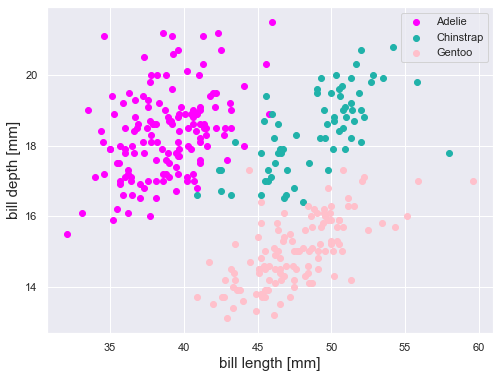

In [22]:
X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    
    elif y == "Chinstrap":
        return 1
    else:
        return 2
         
# Create target value array
y = df["species"].map(make_labels).to_numpy()

# Plot the data
penguins = ["Adelie", "Chinstrap","Gentoo"]
colors = ["magenta", "lightseagreen","pink"]

fig, ax = plt.subplots(figsize = (8, 6))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

In decision tree folder, we use the decision tree trained to make the classification, and the max_depth used is 15. It performed well. Next, we use the bagging and compared results with that of the decision tree.

We first split the dataset into train data and test data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 42)

### 2. Train Decision Tree model and Bagging model

Because we have three labels which are 0,1,2 in y, the max_depth in decision tree must be more than 1.

In [27]:
from sklearn.tree import DecisionTreeClassifier


stump_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        65
           1       0.82      0.85      0.84        27
           2       0.95      0.86      0.90        42

    accuracy                           0.92       134
   macro avg       0.90      0.90      0.90       134
weighted avg       0.92      0.92      0.92       134
 



We next train the decision tree with max_depth is 15 which we got in last try, and train the bagging model with max_depth is 2 for individual decision tree.

In [28]:
tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       0.79      0.85      0.82        27
           2       0.93      0.88      0.90        42

    accuracy                           0.92       134
   macro avg       0.90      0.90      0.90       134
weighted avg       0.92      0.92      0.92       134
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        65
           1       0.82      0.85      0.84        27
           2       0.95      0.86      0.90        42

    accuracy                           0.92       134
   macro avg       0.90      0.90      0.90       134
weighted avg       0.92      0.92      0.92       134
 



From the classification report, we can see that the performance of the decision tree model with max_depth is 15 is almost same as the performance of bagging with max_depth is 2 for individual decision tree. But, we can find that the prediction time of bagging is slower than that of a single decision tree. 

We next see the decision boundary brought by these two classifiers to see if there are some difference.

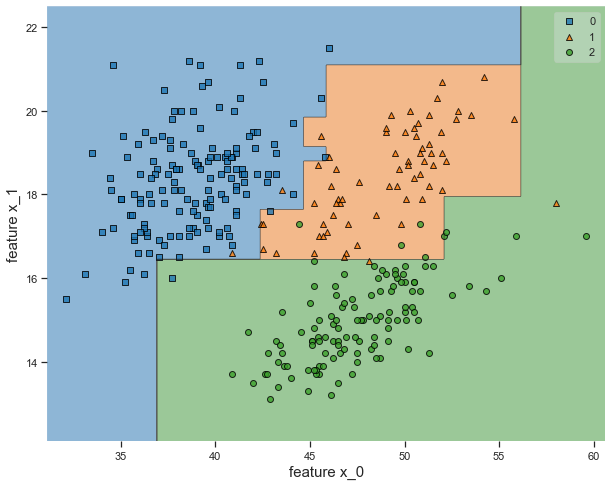

In [29]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

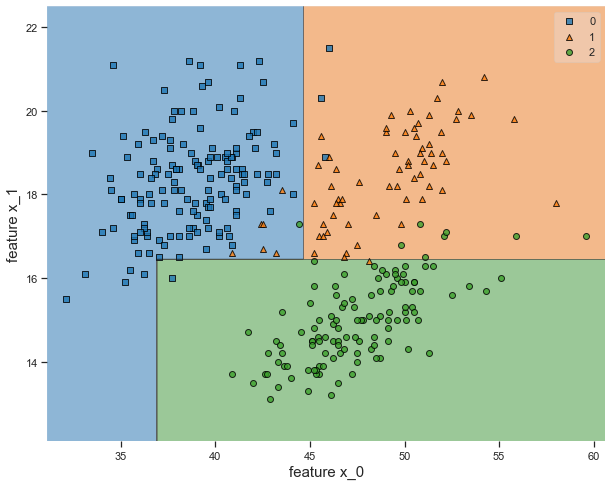

In [30]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

From the decision boundary plot above, we can see that decision tree is more sensitive to data which would cause overfitting. And, bagging can reduce the risk of overfitting.

## Random Forest

Technically speaking, the above bagging model is called a Random forest. Such a model exists inside the sklearn.ensemble module, and is the DecisionTreeClassifier class. However, the random forest algorithm used in training the RandomForestClassifier class introduces extra randomness when growing trees; instead of searching for the best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater diversity of trees which results in even lower variance of the fit model.

Run the following code cell and compare the three models.



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 2, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       0.79      0.85      0.82        27
           2       0.93      0.88      0.90        42

    accuracy                           0.92       134
   macro avg       0.90      0.90      0.90       134
weighted avg       0.92      0.92      0.92       134
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        65
           1       0.82      0.85      0.84        27
           2       0.95      0.86      0.90        42

    accuracy                           0.92       134
   macro avg       0.90      0.90      0.90       134
weighted avg       0.92      0.92      0.92       134
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        65
           1       0.82      0.85      

As obserbed in the output of the above code cell, the accuracy of the bagging classifier with decision stumps and the random forest are the same. However, in theory the random forest model will have less variance than the bagging. Another way we can compare these two models with identical accuracy is to view the decision regions generated by the. Let's next do this by running the following three code cells.



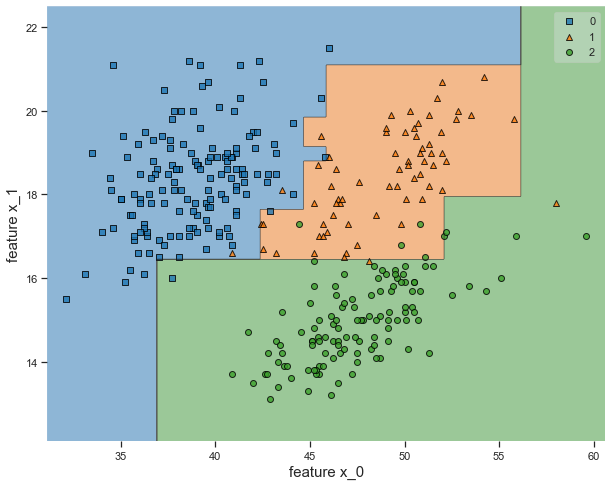

In [33]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()


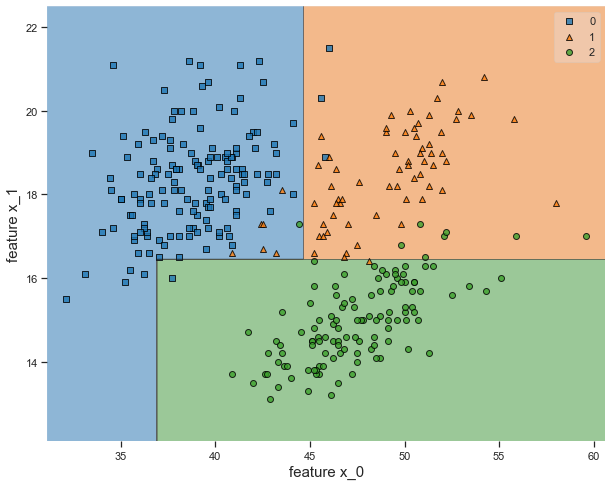

In [34]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

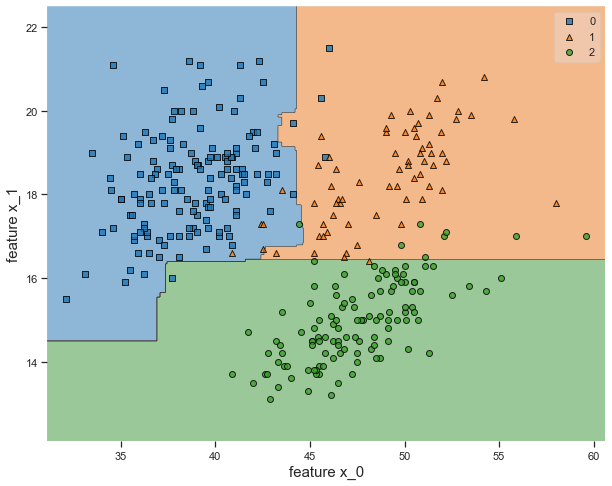

In [35]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()


From the plot above, it seems that the random forest classifier is more accurate and lower variacne than that of bagging

It may be the case that we can improve the performance of all three models by considering more features in the dataset. With this in mind, let's consider these three models on all 4 features of the dataset. This can be done by running the following code cell.

In [37]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)

print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")


bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)

print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")



forest_clf = RandomForestClassifier(max_depth = 2, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)

print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.94      0.88      0.91        33
           2       0.94      0.98      0.96        47

    accuracy                           0.94       134
   macro avg       0.94      0.93      0.94       134
weighted avg       0.94      0.94      0.94       134
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.93      0.85      0.89        33
           2       0.94      1.00      0.97        47

    accuracy                           0.94       134
   macro avg       0.94      0.93      0.93       134
weighted avg       0.94      0.94      0.94       134
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.93      0.85      

### Error Analysis

The classfication report looks very good, when all features are considered. Some recall values in bagging and random 
forest even attain to 1.

<AxesSubplot:>

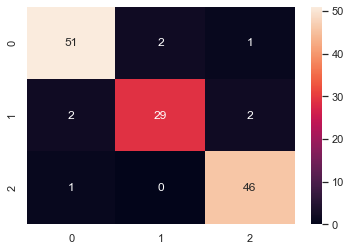

In [47]:
#Confusion matrix for DecisionTreeClassifier
matrix = confusion_matrix(y_test, tree_y_pred)
sns.heatmap(matrix, annot = True, fmt = 'd')

<AxesSubplot:>

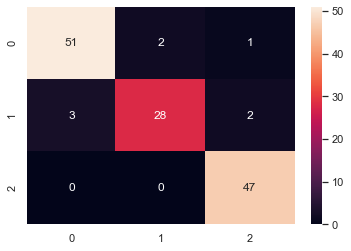

In [51]:
#Confusion matrix for BaggingClassifier
matrix = confusion_matrix(y_test,bag_y_pred)
sns.heatmap(matrix, annot = True, fmt = 'd')

<AxesSubplot:>

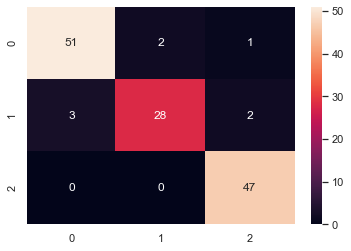

In [52]:
#Confusion matrix for RandomForestClassifier
matrix = confusion_matrix(y_test,forest_y_pred)
sns.heatmap(matrix, annot = True, fmt = 'd')

### Feature Importance

One cool thing about random forests is that these models make it simple to measure feature importance of each feature. Scikit-Learn does this by measuring a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average across all trees in the forest. For example, consider running the following code cell.

In [42]:
names = df.columns[2:]

for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.3403491338464434
bill_depth_mm 0.21962601717811872
flipper_length_mm 0.3951101156439054
body_mass_g 0.04491473333153237


We can see that amony these four features, the body_mass is given the least importance.